In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the csv file
dataset = pd.read_csv("allergy.csv")

FileNotFoundError: File b'allergy.csv' does not exist

In [ ]:
#assigning datasets as independent and dependent variables
x=dataset.iloc[:,12:17].values
y=dataset.iloc[:,18:19].values

In [41]:
#check for empty values
dataset.isnull().any()

sno.           False
State Code     False
County Code    False
Site Num       False
Date Local     False
NO2 Units      False
CO Units       False
O3 Units       False
SO2 Units      False
Address        False
country        False
city           False
state          False
NO2AQI         False
COAQI          False
O3AQI          False
SO2AQI         False
AQI            False
allergy        False
dtype: bool

In [42]:
#apply label encoding on state country and city
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])

In [43]:
x

array([[0, 46, 25, 34, 13],
       [0, 46, 25, 34, 13],
       [0, 46, 25, 34, 13],
       ...,
       [1, 60, 20, 19, 10],
       [1, 60, 31, 19, 10],
       [1, 60, 31, 19, 10]], dtype=object)

In [44]:
x.shape

(1999, 5)

In [45]:
#apply one hot encoding
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(categorical_features=[0])
x=one.fit_transform(x).toarray()

x=x[:,1:]


C:\Users\Munawar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Munawar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [46]:
x.shape

(1999, 5)

In [47]:
#dividing the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)


In [48]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

C:\Users\Munawar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Munawar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)


In [50]:
cm

array([[313,  34],
       [  0, 153]], dtype=int64)

In [51]:
# Visualising the Training set results
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


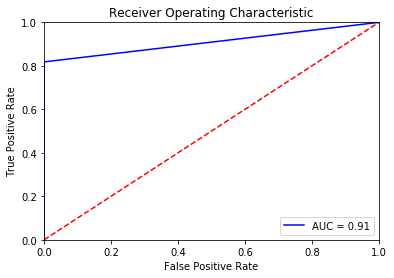

In [52]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[]

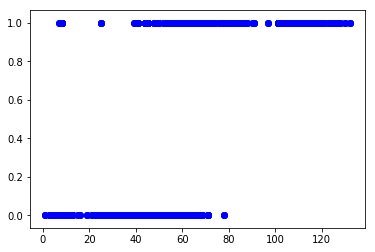

In [54]:
plt.scatter(x_train[:,1],y_train,color="blue")
plt.title("NO2 vs Allergy")
plt.xlabel("")
plt.ylabel("")
plt.plot()


In [73]:
a=x[:,1]
a

array([46., 46., 46., ..., 60., 60., 60.])

[]

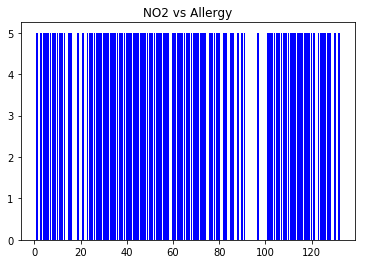

In [80]:
plt.bar(a,height=5,color="blue")
plt.title("NO2 vs Allergy")
plt.xlabel("")
plt.ylabel("")
plt.plot()


{'whiskers': [<matplotlib.lines.Line2D at 0x1f742a4cd68>,
 'caps': [<matplotlib.lines.Line2D at 0x1f742a47710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f742a4cc18>,
 'medians': [<matplotlib.lines.Line2D at 0x1f742a47da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f742a47e80>,
 'means': []}

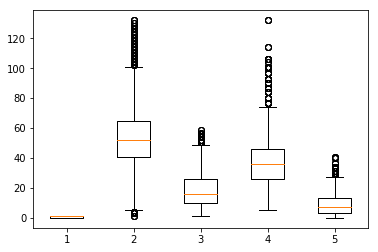

In [66]:
plt.boxplot(x)

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

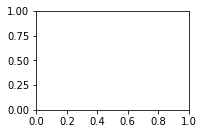

In [87]:
a=x[:,1]
b=x[:,2]
c=x[:,3]
d=x[:,4]
#last parameter is the axes the graph should be in
plt.subplot(2,2,1)
plt.sca(a,y,'red')
plt.subplot(2,2,2)
plt.plot(b,y)
plt.subplot(2,2,3)
plt.plot(c,y,'red')
plt.subplot(2,2,4)
plt.plot(d,y)

In [86]:
from seaborn as sns
g=sns.PairGrid(x)
g.map(plt.scatter)

SyntaxError: invalid syntax (<ipython-input-86-bf6591d63d48>, line 1)